In [1]:
from __future__ import print_function
from joblib import dump,load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from math import sqrt
from sklearn import model_selection
import math
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data Processed/fertilizer_recommendation.csv')

In [3]:
df.columns

Index(['Ca', 'Mg', 'K', 'S', 'N', 'Lime', 'C', 'P', 'Moisture', 'class'], dtype='object')

In [4]:
df.head()

,Ca,Mg,K,S,N,Lime,C,P,Moisture,class
0,0.7,0.6,0.8,0.8,0.7,0.8,0.3,0.1,0.9,4
1,0.5,0.5,0.4,0.3,0.5,0.7,0.5,0.7,0.8,2
2,0.6,0.8,0.1,0.3,0.7,0.5,0.5,0.6,0.6,2
3,0.7,0.7,0.7,0.5,0.8,0.7,0.4,0.1,0.7,4
4,0.8,0.8,0.2,0.3,0.5,0.5,0.7,0.8,0.5,2


In [5]:
df.dtypes

Ca          float64
Mg          float64
K           float64
S           float64
N           float64
Lime        float64
C           float64
P           float64
Moisture    float64
class         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ca        1599 non-null   float64
 1   Mg        1599 non-null   float64
 2   K         1599 non-null   float64
 3   S         1599 non-null   float64
 4   N         1599 non-null   float64
 5   Lime      1599 non-null   float64
 6   C         1599 non-null   float64
 7   P         1599 non-null   float64
 8   Moisture  1599 non-null   float64
 9   class     1599 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 125.0 KB


In [7]:
df.shape

(1599, 10)

In [8]:
df.size

15990

In [9]:
df.isnull().sum()

Ca          0
Mg          0
K           0
S           0
N           0
Lime        0
C           0
P           0
Moisture    0
class       0
dtype: int64

In [10]:
df.describe()

,Ca,Mg,K,S,N,Lime,C,P,Moisture,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.552033,0.552158,0.554284,0.551032,0.551782,0.548030,0.549656,0.550594,0.702939,2.500938
std,0.207752,0.208562,0.209547,0.204817,0.209015,0.205967,0.205063,0.203223,0.141236,1.118104
min,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.500000,1.000000
25%,0.500000,0.500000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.600000,2.000000
50%,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.700000,3.000000
75%,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.800000,3.500000
max,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.900000,4.000000


In [11]:
print("total Unique Values in Fertilizer:",df['class'].nunique())
print()
print("Unique Values in Fertilizer:",df['class'].unique())
print()

total Unique Values in Fertilizer: 4

Unique Values in Fertilizer: [4 2 3 1]



<AxesSubplot:>

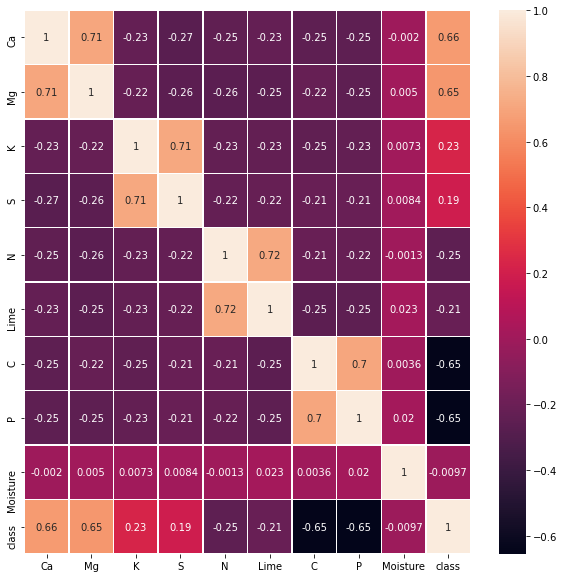

In [12]:
# Correlation
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# Cleaning

In [13]:
df = df.rename(columns={"Ca":"Calcium" , "Mg":"Magnesium" , "K":"Potassium" , "S":"Sulfur" , "N":"Nitrogen" , "C":"Carbon" , 
                       "P":"Phosphorus" , "class":"Fertilizer"})

In [14]:
for i in range(df.shape[0]):
    if df['Fertilizer'].iloc[i] == 1:
        df['Fertilizer'].iloc[i] = 'kieserite'
    elif df['Fertilizer'].iloc[i] == 2:
        df['Fertilizer'].iloc[i] = 'potassium sulphate(SOP)'
    elif df['Fertilizer'].iloc[i] == 3:
        df['Fertilizer'].iloc[i] = 'ammonium nitrate lime(ANL)'
    elif df['Fertilizer'].iloc[i] == 4:
        df['Fertilizer'].iloc[i] = 'single superphosphate(SSP)'

In [15]:
print("total Unique Values in Fertilizer:",df['Fertilizer'].nunique())
print()
print("Unique Values in Fertilizer:",df['Fertilizer'].unique())
print()

total Unique Values in Fertilizer: 4

Unique Values in Fertilizer: ['single superphosphate(SSP)' 'potassium sulphate(SOP)'
 'ammonium nitrate lime(ANL)' 'kieserite']



In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_n = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_o = df.select_dtypes(include=objects)        #  objective dataframe

In [17]:
df_n.columns         #  numeric dataframe

Index(['Calcium', 'Magnesium', 'Potassium', 'Sulfur', 'Nitrogen', 'Lime',
       'Carbon', 'Phosphorus', 'Moisture'],
      dtype='object')

In [18]:
df_o.columns        #  objective dataframe

Index(['Fertilizer'], dtype='object')

In [19]:
df.to_csv('../data Processed/clean_fertilizer_prediction.csv')

In [20]:
df1 = pd.read_csv('../data Processed/clean_fertilizer_prediction.csv')

In [21]:
df1 = df1.drop('Unnamed: 0',axis = 1)

In [22]:
df1.head()

,Calcium,Magnesium,Potassium,Sulfur,Nitrogen,Lime,Carbon,Phosphorus,Moisture,Fertilizer
0,0.7,0.6,0.8,0.8,0.7,0.8,0.3,0.1,0.9,single superphosphate(SSP)
1,0.5,0.5,0.4,0.3,0.5,0.7,0.5,0.7,0.8,potassium sulphate(SOP)
2,0.6,0.8,0.1,0.3,0.7,0.5,0.5,0.6,0.6,potassium sulphate(SOP)
3,0.7,0.7,0.7,0.5,0.8,0.7,0.4,0.1,0.7,single superphosphate(SSP)
4,0.8,0.8,0.2,0.3,0.5,0.5,0.7,0.8,0.5,potassium sulphate(SOP)


<AxesSubplot:>

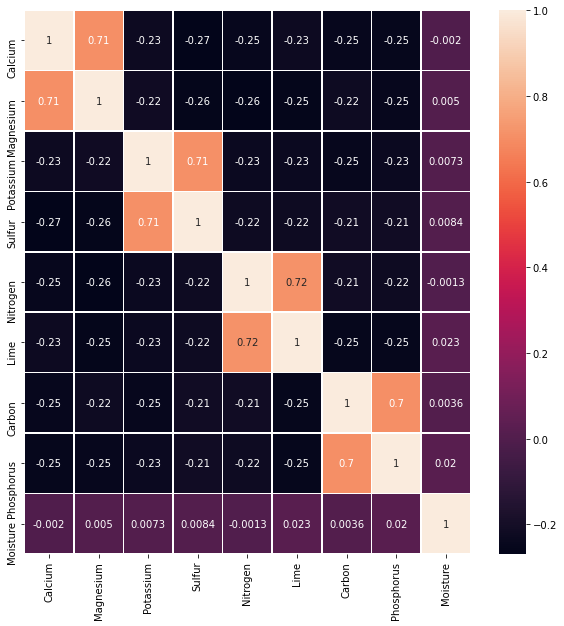

In [23]:
# Correlation
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)

# Data preprocessing

In [24]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy_model = []
model = []

In [25]:
features = df1[['Calcium', 'Magnesium', 'Potassium', 'Sulfur', 'Nitrogen', 'Lime','Carbon', 'Phosphorus', 'Moisture']]
target = df1["Fertilizer"]
print(features)
print(target)

      Calcium  Magnesium  Potassium  Sulfur  Nitrogen  Lime  Carbon  \
0         0.7        0.6        0.8     0.8       0.7   0.8     0.3   
1         0.5        0.5        0.4     0.3       0.5   0.7     0.5   
2         0.6        0.8        0.1     0.3       0.7   0.5     0.5   
3         0.7        0.7        0.7     0.5       0.8   0.7     0.4   
4         0.8        0.8        0.2     0.3       0.5   0.5     0.7   
...       ...        ...        ...     ...       ...   ...     ...   
1594      0.6        0.7        0.5     0.7       0.6   0.6     0.3   
1595      0.8        0.5        0.6     0.5       0.3   0.1     0.7   
1596      0.7        0.8        0.3     0.1       0.7   0.6     0.8   
1597      0.6        0.5        0.8     0.5       0.6   0.8     0.3   
1598      0.4        0.4        0.8     0.6       0.6   0.8     0.8   

      Phosphorus  Moisture  
0            0.1       0.9  
1            0.7       0.8  
2            0.6       0.6  
3            0.1       0.7  
4 

In [26]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state =0)

# Rendom Forest

In [43]:
#to import and initiate RandomForest function
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=0,n_estimators=500,max_depth = 15,min_samples_leaf = 1,min_samples_split = 2)

In [44]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=0)

In [45]:
#predicting values over test dataset
pred_rf= rf_model.predict(x_test)

In [46]:
#import confusion maatrix
from sklearn.metrics import confusion_matrix
#implement of confusion matrix
rf_cm = confusion_matrix(pred_rf , y_test)
rf_cm

array([[86,  0,  0,  0],
       [ 0, 83,  0,  0],
       [ 0,  0, 77,  0],
       [ 0,  0,  0, 74]], dtype=int64)

In [47]:
# plt.figure(figsize=(10,7))
# sns.heatmap(rf_cm,annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [48]:
#calculate the accuracy of the model
x = metrics.accuracy_score(y_test, pred_rf)
accuracy_model.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x*100)

Random Forest's Accuracy is:  100.0


In [49]:
print(classification_report(y_test,pred_rf))

                            precision    recall  f1-score   support

ammonium nitrate lime(ANL)       1.00      1.00      1.00        86
                 kieserite       1.00      1.00      1.00        83
   potassium sulphate(SOP)       1.00      1.00      1.00        77
single superphosphate(SSP)       1.00      1.00      1.00        74

                  accuracy                           1.00       320
                 macro avg       1.00      1.00      1.00       320
              weighted avg       1.00      1.00      1.00       320



In [50]:
# Cross validation score (Random Forest)
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf_model,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [51]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/FertRandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rf_model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# prediction

In [86]:
data = np.array([[0.7,0.6,0.8, 0.8, 0.7, 0.8, 0.3, 0.1, 0.3]])
prediction = rf_model.predict(data)
print(prediction)

['single superphosphate(SSP)']


In [87]:
data = np.array([[0.9,0.9,0.9, 0.9, 0.9, 0.9, 0.1, 0.2, 0.9]])
prediction = rf_model.predict(data)
print(prediction)

['single superphosphate(SSP)']
